# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [124]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df1 = pd.read_excel("Online Retail.xlsx")
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Find The shape of the DataFrame**

In [106]:
df1.shape

(541909, 8)

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


We can see that we have multiple null values in the dataset there for its required that we clean the data before performing any analytics on it 

In [108]:
df1.dropna(inplace = True)

In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


We can see that all columns now have equal number of non-null values 


In [110]:
df1.describe()


,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Quantity has a minimum value of **-80995** that is not possible and keeping this value shall hinder our analysis

In [111]:
df1['Quantity']  = df1['Quantity'].abs()

In [116]:
to_drop = df1[df1['UnitPrice'] <1].index
df1 =df1.drop(to_drop)

In [117]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,312592.000000,312592.000000,312592.000000
mean,10.748090,4.322520,15289.330536
std,279.791898,79.055751,1712.145048
min,1.000000,1.000000,12346.000000
25%,2.000000,1.650000,13969.000000
50%,4.000000,2.490000,15150.000000
75%,10.000000,4.250000,16794.000000
max,80995.000000,38970.000000,18287.000000


 Now we can see that the minimum value is 1 for Quantity as well as the unit price.

In [118]:
df1['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Israel',
       'Finland', 'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

## Finding Orders Per Country

In [119]:
orders_per_country = df1.groupby('Country')
orders_per_country = orders_per_country['InvoiceNo'].nunique()

orders_per_country.head()

Country
Australia     68
Austria       18
Bahrain        2
Belgium      118
Brazil         1
Name: InvoiceNo, dtype: int64

### Finding the top 5 countries with the highest numbers of orders

In [120]:
top_5_countries = orders_per_country.sort_values(ascending = False).head(5)

In [121]:
top_5_countries


Country
United Kingdom    19304
Germany             594
France              453
EIRE                314
Belgium             118
Name: InvoiceNo, dtype: int64

### Ploting the countries with highest orders

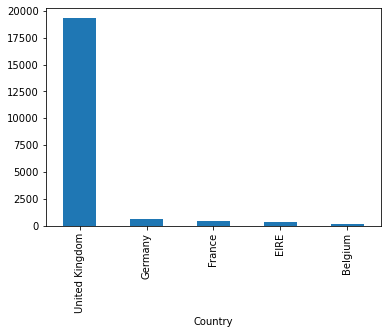

In [127]:
top_5_countries.plot(
    kind ='bar',
    legend = False)

#plt.xlabel ('Country')
#plt.ylabel ('Orders')
#plt.title = ('Top 5 countries with the highest orders')
plt.show()

#### Analysis

Looking at the bar graph for the countries with the highest number of orders placed, we can see that **United Kingdom** has the highest number of orders (19857). It was expected that **United Kingdom** would have exponentailly higher order incomparison to the other countried as this online platform is UK based.

#### Unique Number of Customers

In [128]:
print(df1['CustomerID'].nunique())

4337


### Highest Spending Customers

In [129]:
Highest_spending_customers = df1.groupby('CustomerID')
Highest_spending_customers = Highest_spending_customers['InvoiceNo'].nunique()

In [130]:
Highest_spending_customers.head()

CustomerID
12346.0    2
12347.0    7
12348.0    4
12349.0    1
12350.0    1
Name: InvoiceNo, dtype: int64

In [131]:
Highest_spending_customers.sort_values(ascending = False , inplace = True)
Highest_spending_customers = Highest_spending_customers.head()
Highest_spending_customers

CustomerID
14911.0    248
12748.0    207
17841.0    168
14606.0    124
15311.0    117
Name: InvoiceNo, dtype: int64

### Plotting the Top 5 customers 

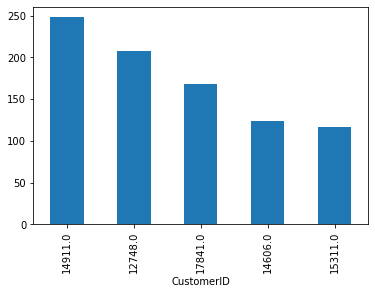

In [132]:
Highest_spending_customers.plot(
    kind ='bar',
    legend = False
    );
plt.xlabel = 'Customer ID'
plt.ylabel = 'No of Orders Placed'
plt.title = 'Top 5 customers with highest number of orders placed'
plt.show()

Can be seen that customer **14911** placed approximately 250 orders in the whole year while customer **12748** placed 224 orders in the whole year. Making them the Top 2 purchasers of the online retail store

### Computing the highest and the lowest value orders

In [133]:
df = df1
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [134]:
df['Total'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [135]:
order_cost = df.groupby('InvoiceNo')['Total'].sum()
order_cost.head()

InvoiceNo
536365    139.12
536366     22.20
536367    278.73
536368     70.05
536369     17.85
Name: Total, dtype: float64

In [136]:
order_cost.sort_values(ascending = False , inplace = True)

In [137]:
order_cost = order_cost.head()

In [138]:
order_cost

InvoiceNo
581483     168469.6
C581484    168469.6
C541433     77183.6
541431      77183.6
556444      38970.0
Name: Total, dtype: float64

In [139]:
print( 'The maximum order value is : ' , order_cost.max())

The maximum order value is :  168469.6


In [140]:
order_cost_low = df.groupby('InvoiceNo')['Total'].sum()
order_cost_low.sort_values(ascending=True , inplace = True)
order_cost_low = order_cost_low.head()

In [141]:
order_cost_low

InvoiceNo
572832     1.00
C551386    1.01
C571680    1.06
C571678    1.06
C558060    1.06
Name: Total, dtype: float64

### Top 5 highest valued orders

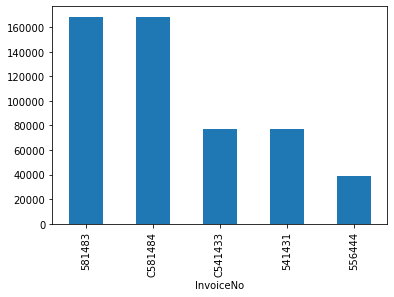

In [142]:
order_cost.plot(
    kind ='bar',
    legend = False
        
);

### Top 5 lowest valued orders

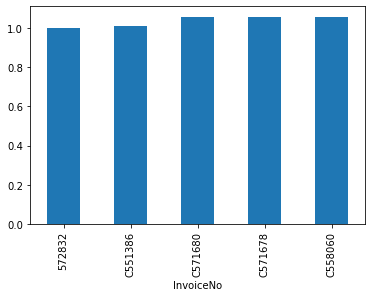

In [143]:
order_cost_low.plot(
    kind ='bar',
    legend = False
        
);

#### Seperate the Month from the date

In [144]:
df['Date'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time
df.drop(columns=['InvoiceDate'] , inplace = True)
df.head()


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00


In [145]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total,Date,Time,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,12


## Busiest Months of the year with highest number of orders

In [148]:
busy_months = df.groupby('Month')['InvoiceNo'].nunique()
busy_months.sort_values(ascending = False , inplace = True)
busy_months = busy_months.head()
busy_months

Month
11    3021
12    2567
10    2212
9     2017
5     1798
Name: InvoiceNo, dtype: int64

In [150]:
import calendar
df2 = df
df2.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total,Date,Time,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,12


In [151]:
df2['Month_Name'] = df2['Month'].apply(lambda x: calendar.month_abbr[x])
df2.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total,Date,Time,Month,Month_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,12,Dec
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,12,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,12,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,12,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,12,Dec


In [152]:
busy_months = df.groupby('Month_Name')['InvoiceNo'].nunique()
busy_months.sort_values(ascending = False , inplace = True)
busy_months = busy_months.head()
busy_months

Month_Name
Nov    3021
Dec    2567
Oct    2212
Sep    2017
May    1798
Name: InvoiceNo, dtype: int64

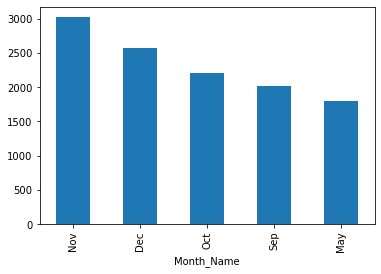

In [157]:
busy_months.plot(
    kind = 'bar',
    legend = False
    
);
#plt.xlabel ('Month')
#plt.ylabel ('No of orders')
#plt.title ('Busiest months interm of sales')
plt.show()

In [159]:
month_sale_trend = df1.groupby('Month')['InvoiceNo'].nunique()
month_sale_trend.head()

Month
1    1206
2    1160
3    1578
4    1350
5    1798
Name: InvoiceNo, dtype: int64

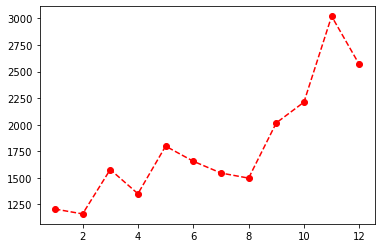

In [163]:
plt.plot(
    month_sale_trend.index,
    month_sale_trend.values,
    color = 'red',
    linestyle = '--',
    marker = 'o',
    label = 'Sales'
 
);
plt.xlabel = 'Months'
plt.ylabel = 'Sales'
plt.title = 'Sales Trend'
plt.show()

The line graph above shows the trend in online sales for the year 2010
* It can be seen that the sales were not consistent for the first 8 months ( January to August)
* it can be seen that the sales significantly increased till November where it reached to a milestone of 3021 sales. This could be due to the holiday season approaching. 

### Top selling Products

In [164]:
top_selling_product2 = df1.groupby('Description')['Quantity'].sum()
top_sell = top_selling_product2.sort_values(ascending = False).head(5)
top_sell

Description
PAPER CRAFT , LITTLE BIRDIE           161990
MEDIUM CERAMIC TOP STORAGE JAR        152410
JUMBO BAG RED RETROSPOT                47296
WHITE HANGING HEART T-LIGHT HOLDER     39303
ASSORTED COLOUR BIRD ORNAMENT          35410
Name: Quantity, dtype: int64

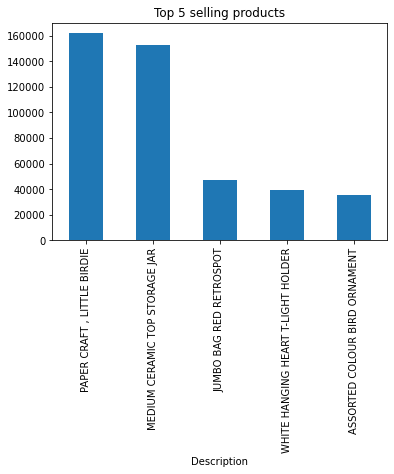

In [170]:
top_sell.plot(
    kind = 'bar',
    title = 'Top 5 selling products'
   
);

#### Top 5 products are:

* PAPER CRAFT , LITTLE BIRDIE
* MEDIUM CERAMIC TOP STORAGE JAR
* JUMBO BAG RED RETROSPOT
* WHITE HANGING HEART T-LIGHT HOLDER	

